In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima import auto_arima

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

# COVID

In [2]:
# import data
df_covid_d = pd.read_csv("../Data/silver/covid_data.csv")
df_covid_w = pd.read_csv("../Data/silver/covid_data_weekly.csv")
df_covid_m = pd.read_csv("../Data/silver/covid_data_monthly.csv")

In [5]:
df_covid_d.head()

,state,country,lat,long,date,cases,new_cases
0,NaN,Brazil,-14.235,-51.9253,2020-01-22,0,0
1,NaN,Brazil,-14.235,-51.9253,2020-01-23,0,0
2,NaN,Brazil,-14.235,-51.9253,2020-01-24,0,0
3,NaN,Brazil,-14.235,-51.9253,2020-01-25,0,0
4,NaN,Brazil,-14.235,-51.9253,2020-01-26,0,0


In [4]:
df_covid_d['date'] = pd.to_datetime(df_covid_d['date'])
df_covid_w['date'] = pd.to_datetime(df_covid_w['date'])
df_covid_m['date'] = pd.to_datetime(df_covid_m['date'])

In [6]:
# Set 'date' as the index
df_covid_d.set_index('date', inplace=True)
df_covid_w.set_index('date', inplace=True)
df_covid_m.set_index('date', inplace=True)

In [11]:
# Function to plot ACF and PACF
def plot_acf_pacf(series, lags=20):
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    plot_acf(series, lags=lags, ax=axes[0])
    plot_pacf(series, lags=lags, ax=axes[1])
    plt.show()

In [8]:
# Function to perform ADF test
def adf_test(series):
    result = adfuller(series)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'   {key}: {value}')

In [9]:
# Function to fit ARIMA model
def fit_arima(series, seasonal=True):
    model = auto_arima(series, seasonal=seasonal, trace=True, error_action='ignore', suppress_warnings=True)
    model.summary()
    return model

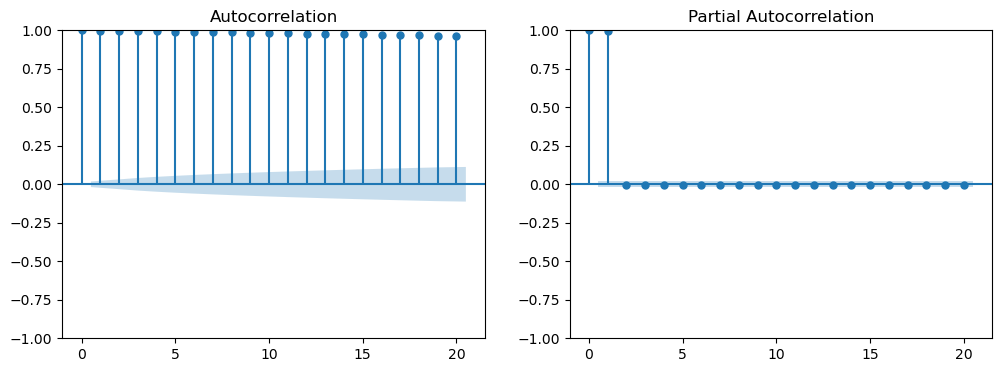

ADF Statistic: -3.1442882301452437
p-value: 0.023444587831804066
Critical Values:
   1%: -3.430922295855108
   5%: -2.861792924207511
   10%: -2.5669046264571076


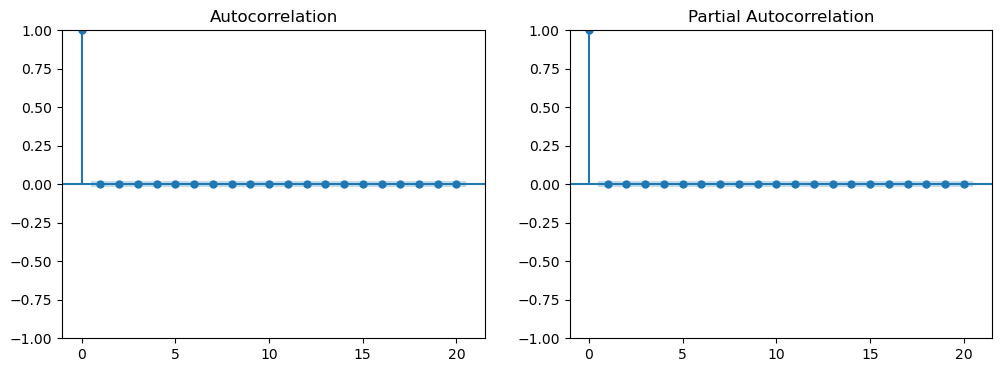

NameError: name 'auto_arima' is not defined

In [14]:
#  Daily
series_d = df_covid_d['cases']

# Plot ACF and PACF of original series
plot_acf_pacf(series_d)

# Perform ADF test
adf_test(series_d)

# Difference the series if necessary
series_d_diff = series_d.diff().dropna()

# Plot ACF and PACF of differenced series
plot_acf_pacf(series_d_diff)

# Fit ARIMA model
model_d = fit_arima(series_d)